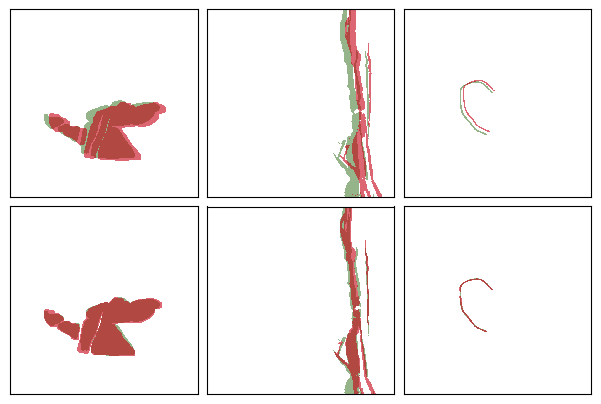

In [3]:
from spectralwaste.dataset import SpectralWasteDataset
from spectralwaste import alignment, utils

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

dataset_rgb = SpectralWasteDataset('../data/dataset', '../data/metadata/annotations_rgb_iros2024.json')
dataset_hyper = SpectralWasteDataset('../data/dataset', '../data/metadata/annotations_hyper_iros2024.json')

transfer_model = alignment.LabelTransferModel(verbose=False)

# image_id, rgb_mask_idx, hyper_mask_idx
inputs = [
    ('20230119_03_100832', 2, 3), # film
    ('20230119_03_100835', 4, 4), # video_tape
    ('20230117_11_115038', 2, 2) # filamnet
]

cmap_gt = ListedColormap(['#ffffff00', '#50823b99'])
cmap_transfer = ListedColormap(['#ffffff00', '#c5001399'])

fig, axs = plt.subplots(2, 3, figsize=(7.5, 5), gridspec_kw={'hspace': 0.05, 'wspace': 0.05})

for i, (image_id, rgb_mask_idx, hyper_mask_idx) in enumerate(inputs):
    rgb_image = dataset_rgb.get_image(image_id)
    hyper_image = dataset_hyper.get_image(image_id)

    rgb = hyper_image.read_rgb()
    hyper = hyper_image.read_hyper()

    rgb_instance = rgb_image.get_instance_labels()
    hyper_instance = hyper_image.get_instance_labels()

    rgb_align, hyper_align, rgb_instance_align, hyper_instance_align = alignment.multimodal_manual_align(rgb, hyper, rgb_instance, hyper_instance)

    hyper_align_color = utils.image_processing.false_color(hyper_align)
    transferred_instance = transfer_model.transfer_instance_labels(rgb_align, hyper_align_color, rgb_instance_align)

    # Plot manual alignment
    axs[0, i].imshow(hyper_instance_align['masks'][hyper_mask_idx], cmap=cmap_gt, interpolation='none')
    axs[0, i].imshow(rgb_instance_align['masks'][rgb_mask_idx], cmap=cmap_transfer, interpolation='none')
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])

    # Plot label transfer
    axs[1, i].imshow(hyper_instance_align['masks'][hyper_mask_idx], cmap=cmap_gt, interpolation='none')
    axs[1, i].imshow(transferred_instance['masks'][rgb_mask_idx], cmap=cmap_transfer, interpolation='none')
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])